# Homework 2

Visualize, describe, and model distributions

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from utils import decorate
from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

Here are some of the functions from Chapter 5.

In [2]:
def MakeNormalModel(values, label=''):
    """Plots a CDF with a Normal model.

    values: sequence
    """
    cdf = thinkstats2.Cdf(values, label=label)

    mean, var = thinkstats2.TrimmedMeanVar(values)
    std = np.sqrt(var)
    print('n, mean, std', len(values), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

In [38]:
def MakeNormalPlot(values, label=''):
    """Generates a normal probability plot.

    values: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(values, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(values)
    thinkplot.Plot(xs, ys, alpha=0.3, label=label)

Read the GSS data again.

In [4]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape

CPU times: user 160 ms, sys: 24 ms, total: 184 ms
Wall time: 243 ms


(62466, 101)

In [5]:
gss.head()

,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
0,1972,167,0,0,2,0,26.0,18.0,12,12,...,0,13537.0,1946.0,0,0,0.8893,2.0,0,0,1.0
1,1972,1256,30,2,0,1,38.0,12.0,97,99,...,0,18951.0,1934.0,1964,0,0.4446,1.0,0,0,1.0
2,1972,415,0,0,7,0,57.0,12.0,7,7,...,0,30458.0,1915.0,0,0,1.3339,3.0,0,0,1.0
3,1972,234,18,1,6,3,61.0,14.0,8,5,...,0,37226.0,1911.0,1929,0,0.8893,2.0,0,0,1.0
4,1972,554,22,2,3,3,59.0,12.0,6,11,...,0,30458.0,1913.0,1935,0,0.8893,2.0,0,0,1.0


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [6]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid(gss)

### Distribution of age

Here's the CDF of ages.

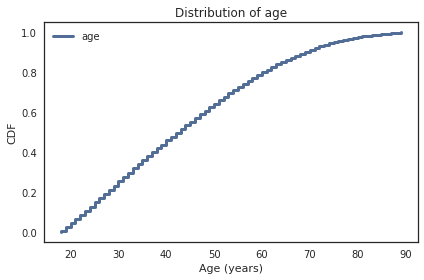

In [7]:
cdf_age = Cdf(gss.age)
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

**Exercise**:  Each of the following cells shows the distribution of ages under various transforms, compared to various models.  In each text cell, add a sentence or two that interprets the result.  What can we say about the distribution of ages based on each figure?

1) Here's the CDF of ages compared to a normal distribution with the same mean and standard deviation.

Interpretation: The distribution of ages is not well modeled by a normal distribution

n, mean, std 62281 44.47905368874617 16.482037485676


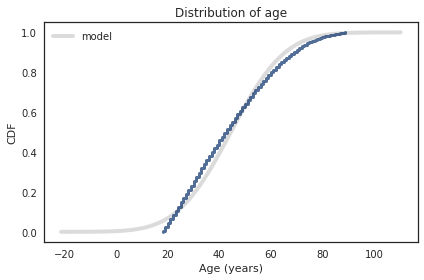

In [12]:
MakeNormalModel(gss.age.dropna(), label='')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

2) Here's a normal probability plot for the distribution of ages.

Interpretation: This confirms that the distrubution is not well modeled by a normal distribution

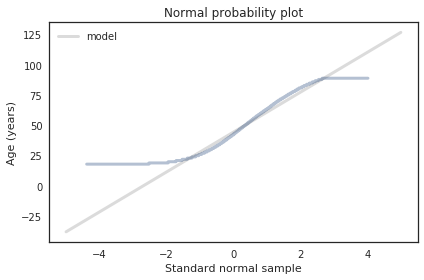

In [39]:
MakeNormalPlot(gss.age.dropna(), label='')

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Age (years)')

3) Here's the complementary CDF on a log-y scale.

Interpretation: The distribution of age is not well modeled by an exponential distribution

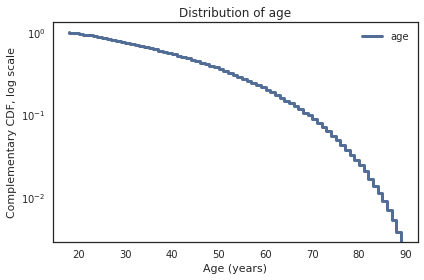

In [11]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

4) Here's the CDF of ages on a log-x scale.

Interpretation: It is unlikely the distribution of ages is well modeled as a lognormal distribution

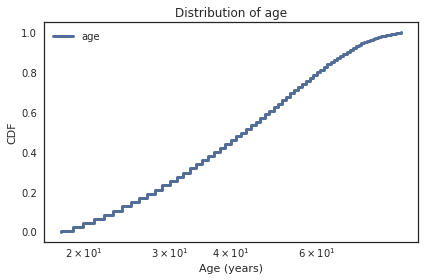

In [14]:
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF',
         xscale='log')

5) Here's the CDF of the logarithm of ages, compared to a normal model.

Interpretation:

n, mean, std 62281 1.6168744157503179 0.16787914328916784


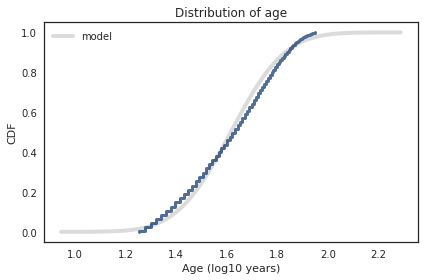

In [21]:
values = np.log10(gss.age.dropna())
MakeNormalModel(values, label='')

decorate(title='Distribution of age', 
         xlabel='Age (log10 years)', 
         ylabel='CDF')

6) Here's a normal probability plot for the logarithm of ages.

Interpretation: A lognormal distribution is most likely not a good fit.

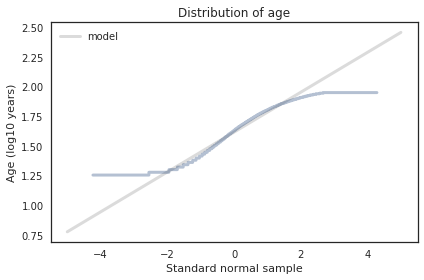

In [40]:
MakeNormalPlot(values, label='')

decorate(title='Distribution of age', 
         xlabel='Standard normal sample', 
         ylabel='Age (log10 years)')

7) Here's the complementary CDF on a log-log scale.

Interpretation: The age distribution is also not well modeled by a pareto distribution.

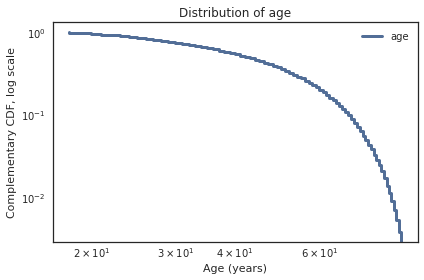

In [41]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

8) Here's a test to see whether ages are well-modeled by a Weibull distribution.

Interpretation: This is also not a striaght line, so it is also not a good fit.

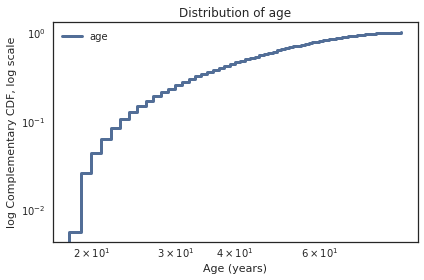

In [42]:
thinkplot.cdf(cdf_age, label='age', transform='Weibull')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

### Distribution of income

Here's the CDF of `realinc`.

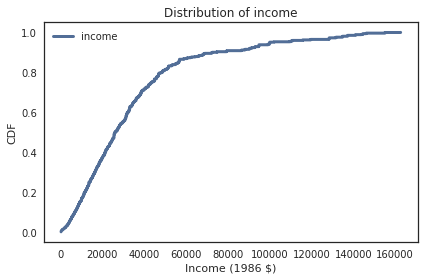

In [43]:
cdf_realinc = Cdf(gss.realinc)
thinkplot.cdf(cdf_realinc, label='income')

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

**Exercise:** Use visualizations like the ones in the previous exercise to see whether there is an analytic model that describes the distribution of `gss.realinc` well.

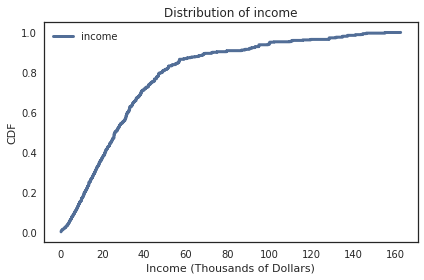

In [52]:
cdf_realinc = Cdf(gss.realinc/1000)
thinkplot.cdf(cdf_realinc, label='income')

decorate(title='Distribution of income', 
         xlabel='Income (Thousands of Dollars)', 
         ylabel='CDF')

2) Here's a normal probability plot for the values.

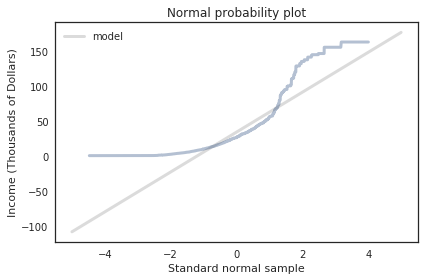

In [56]:
MakeNormalPlot(gss.realinc.dropna()/1000, label='')

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Income (Thousands of Dollars)')

3) Here's the complementary CDF on a log-y scale.

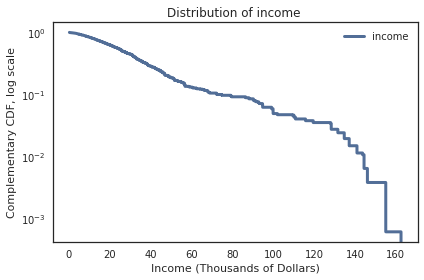

In [59]:
thinkplot.cdf(cdf_realinc, label='income', complement=True)

decorate(title='Distribution of income ', 
         xlabel='Income (Thousands of Dollars)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

4) Here's the CDF on a log-x scale.

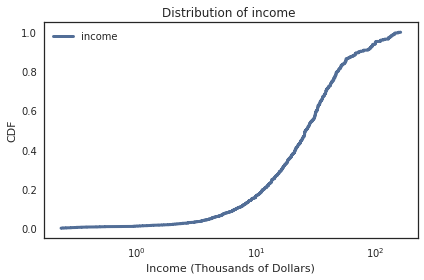

In [60]:
thinkplot.cdf(cdf_realinc, label='income')

decorate(title='Distribution of income ', 
         xlabel='Income (Thousands of Dollars)', 
         ylabel='CDF',
         xscale='log')

5) Here's the CDF of the logarithm of the values, compared to a normal model.

n, mean, std 55499 1.3810317365141316 0.3856600273208646


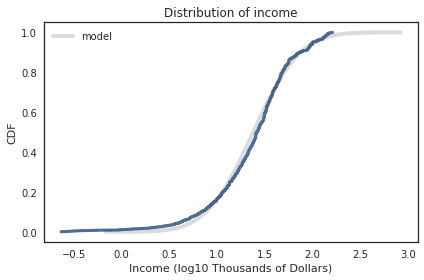

In [63]:
values = np.log10(gss.realinc.dropna()/1000)
MakeNormalModel(values, label='')

decorate(title='Distribution of income', 
         xlabel='Income (log10 Thousands of Dollars)', 
         ylabel='CDF')

6) Here's a normal probability plot for the logarithm of the values.

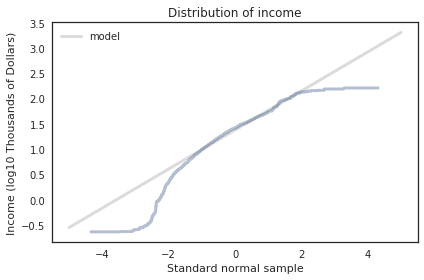

In [64]:
MakeNormalPlot(values, label='')

decorate(title='Distribution of income', 
         xlabel='Standard normal sample', 
         ylabel='Income (log10 Thousands of Dollars)')

7) Here's the complementary CDF on a log-log scale.

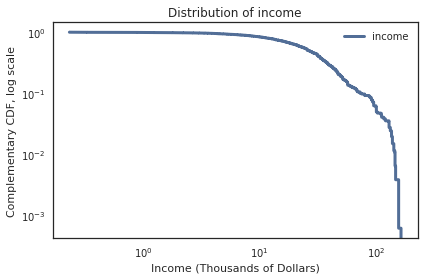

In [65]:
thinkplot.cdf(cdf_realinc, label='income', complement=True)

decorate(title='Distribution of income', 
         xlabel='Income (Thousands of Dollars)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

8) Here's a test to see whether the values are well-modeled by a Weibull distribution.

Interpretation: The best analytical fit seems to be a lognormal distribution, closely matched for values up to 2 standard deviations from the mean.

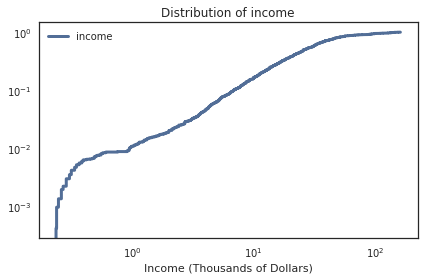

In [67]:
thinkplot.cdf(cdf_realinc, label='income', transform='Weibull')

decorate(title='Distribution of income', 
         xlabel='Income (Thousands of Dollars)',
         xscale='log',
         yscale='log')

## BRFSS


In [68]:
%time brfss = pd.read_hdf('brfss.hdf5', 'brfss')
brfss.head()

CPU times: user 4 ms, sys: 4 ms, total: 8 ms
Wall time: 6.94 ms


,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,46.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,83.0
57312,2.0,163.0,72.57,8.0,390.248599,5.0,43.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,30.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,30.0


Let's look at the distribution of height in the BRFSS dataset.  Here's the CDF.

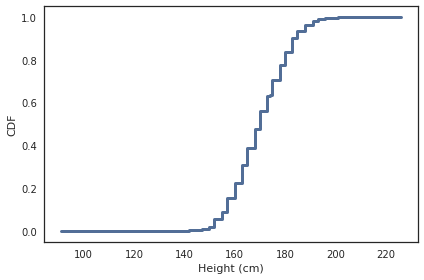

In [69]:
heights = brfss.HTM4

cdf_heights = Cdf(heights)
thinkplot.Cdf(cdf_heights)

decorate(xlabel='Height (cm)', ylabel='CDF')

To see whether a normal model describes this data well, we can use KDE to estimate the PDF.

In [70]:
from scipy.stats import gaussian_kde

Here's an example using the default bandwidth method.

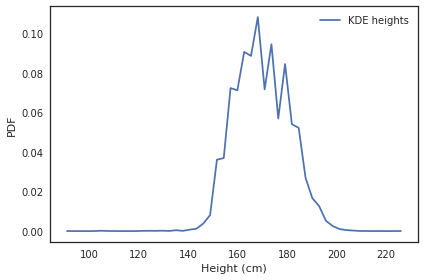

In [71]:
kde = gaussian_kde(heights.dropna())

xs = np.linspace(heights.min(), heights.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

It doesn't work very well; we can improve it by overriding the bandwidth with a constant.

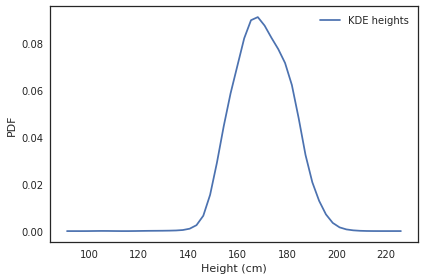

In [72]:
kde = gaussian_kde(heights.dropna(), bw_method=0.3)

ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

Now we can generate a normal model with the same mean and standard deviation.

In [73]:
mean = heights.mean()
std = heights.std()

mean, std

(170.09044280714292, 10.795080237191394)

Here's the model compared to the estimated PDF.

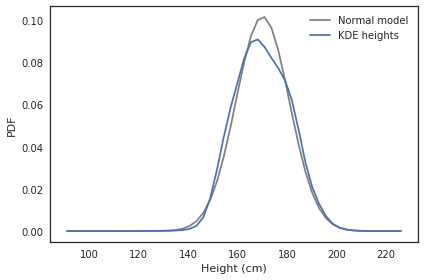

In [74]:
normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

The data don't fit the model particularly well, possibly because the distribution of heights is a mixture of two distributions, for men and women.

**Exercise:** Generate a similar figure for just women's heights and see if the normal model does any better.

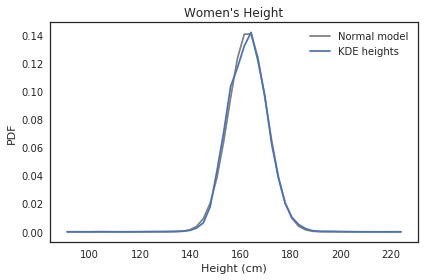

In [79]:
heights_women = brfss.HTM4[brfss.SEX == 2.0]

kde = gaussian_kde(heights_women.dropna(), bw_method=0.3)
xs = np.linspace(heights_women.min(), heights_women.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

mean = heights_women.mean()
std = heights_women.std()
normal_pdf = thinkstats2.NormalPdf(mean, std)
ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(title ='Women\'s Height', xlabel='Height (cm)', ylabel='PDF')



The normal model fits much better for just women compared to all adults

**Exercise:** Generate a similar figure for men's weights, `brfss.WTKG3`.  How well does the normal model fit?

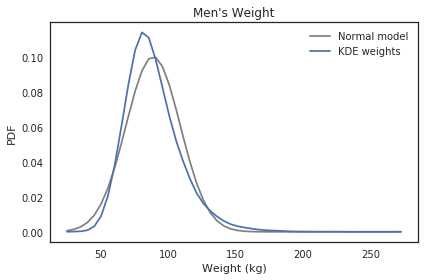

In [81]:
weights_men = brfss.WTKG3[brfss.SEX == 1.0]

kde = gaussian_kde(weights_men.dropna(), bw_method=0.3)
xs = np.linspace(weights_men.min(), weights_men.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

mean = weights_men.mean()
std = weights_men.std()
normal_pdf = thinkstats2.NormalPdf(mean, std)
ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE weights')

decorate(title ='Men\'s Weight', xlabel='Weight (kg)', ylabel='PDF')


The normal model does not fit very closely

**Exercise:** Try it one more time with the log of men's weights.  How well does the normal model fit?  What does that imply about the distribution of weight?

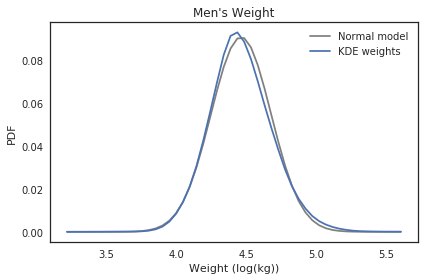

In [84]:
weights_men = np.log(brfss.WTKG3[brfss.SEX == 1.0])

kde = gaussian_kde(weights_men.dropna(), bw_method=0.3)
xs = np.linspace(weights_men.min(), weights_men.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

mean = weights_men.mean()
std = weights_men.std()
normal_pdf = thinkstats2.NormalPdf(mean, std)
ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE weights')

decorate(title ='Men\'s Weight', xlabel='Weight (log(kg))', ylabel='PDF')


The fit is much better, imlyping a lognormal distribution describes the distibution of weight pretty well.

## Skewness

Let's look at the skewness of the distribution of weights for men and women.

In [85]:
male = (brfss.SEX == 1)
male_weights = brfss.loc[male, 'WTKG3']

In [86]:
female = (brfss.SEX == 2)
female_weights = brfss.loc[female, 'WTKG3']

As we've seen, these distributions are skewed to the right, so we expect the mean to be higher than the median. 

In [87]:
male_weights.mean(), male_weights.median()

(88.83871202341662, 86.18)

We can compute the moment-based sample skewness using Pandas or `thinkstats2`.  The results are almost the same.

In [88]:
male_weights.skew(), thinkstats2.Skewness(male_weights.dropna())

(1.2607915291363547, 1.2607508370740947)

But moment-based sample skewness is a terrible statistic!  A more robust alternative is Pearson's median skewness:

In [89]:
thinkstats2.PearsonMedianSkewness(male_weights.dropna())

0.3961356157532533

**Exercise:** Compute the same statistics for women.  Which distribution is more skewed?

In [90]:
female_weights.mean(), female_weights.median()

(73.6243871435631, 70.31)

In [91]:
female_weights.skew(), thinkstats2.Skewness(female_weights.dropna())

(1.3693028811523575, 1.3692590742841042)

In [92]:
thinkstats2.PearsonMedianSkewness(female_weights.dropna())

0.5268415056705406

The distribution of weigths for females is more skewed.

**Exercise:** Explore the GSS or BRFSS dataset and find something interesting!

Looking to see if we can find an analytical distribution that well fits the distribution of the age at which people get married

First I will plot a CDF the distribution

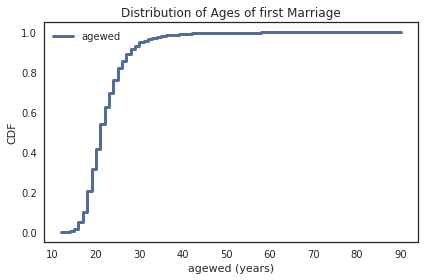

In [96]:
gss.agewed.replace([98,99,0], np.nan, inplace=True)
cdf_agewed = Cdf(gss.agewed)
thinkplot.cdf(cdf_agewed, label='agewed')

decorate(title='Distribution of Ages of first Marriage', 
         xlabel='agewed (years)', 
         ylabel='CDF')

I will try using KDE to estimate the PDF of ages of first marriage, to see if a normal model describes this data well

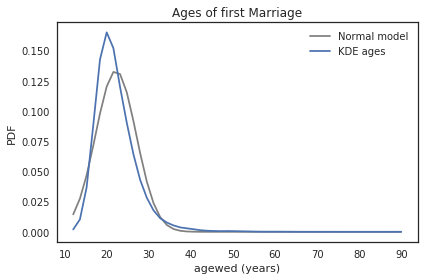

In [99]:
agewed = gss.agewed

kde = gaussian_kde(agewed.dropna(), bw_method=0.3)
xs = np.linspace(agewed.min(), agewed.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

mean = agewed.mean()
std = agewed.std()
normal_pdf = thinkstats2.NormalPdf(mean, std)
ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE ages')

decorate(title ='Ages of first Marriage', xlabel='agewed (years)', ylabel='PDF')

Based on the shape of the approxitmate PDF, I want to check if a lognormal distribution might better fit the data.

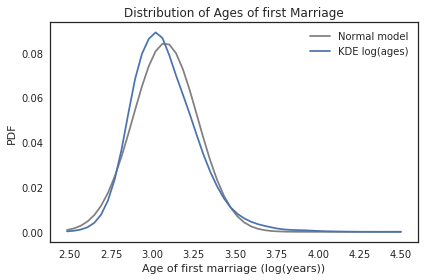

In [106]:
agewed = np.log(gss.agewed)

kde = gaussian_kde(agewed.dropna(), bw_method=0.3)
xs = np.linspace(agewed.min(), agewed.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

mean = agewed.mean()
std = agewed.std()
normal_pdf = thinkstats2.NormalPdf(mean, std)
ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE log(ages)')

decorate(title ='Distribution of Ages of first Marriage', xlabel='Age of first marriage (log(years))', ylabel='PDF')

This is a better fit - I will try plotting a normal probaility plot with the log of the ages

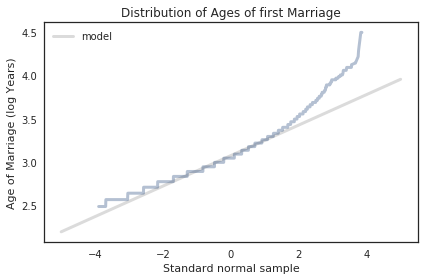

In [107]:
values = np.log(gss.agewed.dropna())
MakeNormalPlot(values, label='')

decorate(title='Distribution of Ages of first Marriage', 
         xlabel='Standard normal sample', 
         ylabel='Age of Marriage (log Years)')

The deviation in the normal probablity plot happens at the tail end of the distribution, at about 2 standard deviations. There are a few very large ages at which people have gotten married for the first time that skwes the distribution, so I will say a lognormal distribution fits the ages at people first get married well for most of the data over all.